<a href="https://colab.research.google.com/github/isaacbyr/Practice-Projects/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is another dataset downloaded from kaggle. This dataset focuses on housing prices in California from 1990. It has many differetn features such as longitude,latitude, median income of household, rooms, bedrooms and so on. The goal of this project is to use regression techniques to build a model that can somewhat accuratley predict housing prices given the input features

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isaacbyr","key":"5881667892cb724f4234844a7f6ae768"}'}

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 59.8MB/s]


In [16]:
!mkdir housing
!mv california-housing-prices.zip housing

In [17]:
%cd housing

/content/housing


In [18]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [20]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
df['ocean_proximity'].value_counts()

# because we have a categorical value we will have to encode it.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
df.isnull().sum()

# it looks like there is some values missing for total_bedrooms, we can simply impute the median to fix that

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
# lets take a look at these null values for total_bedrooms

nan_df = df[df.isna().any(axis=1)]
nan_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [33]:
# Imputing the median into the null values is total_bedroom
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

# we must drop the categorical column in order for this code to run
housing_num = df.drop(columns = 'ocean_proximity', axis = 1)

X = imputer.fit(housing_num)

In [36]:
housing_tr = pd.DataFrame(X, columns = df.columns, index =df.index)
housing_tr.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

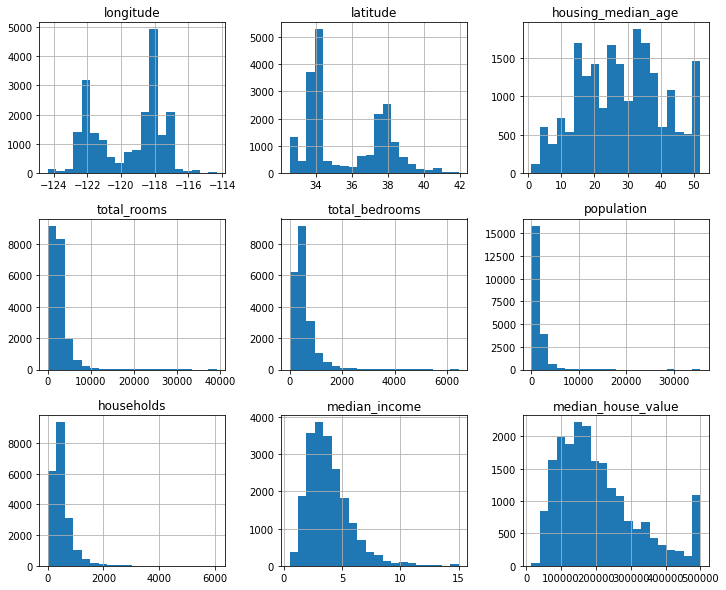

In [42]:
housing_num.hist(figsize = (12,10), bins = 20)
plt.show()

In [48]:
housing_corr = df.corr()
housing_corr.sort_values('median_house_value', ascending = False)['median_house_value']

# we can see that median_income has the highest correlation to median_house_value therefore it it most likely the best feature
# in predicting housing prices

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

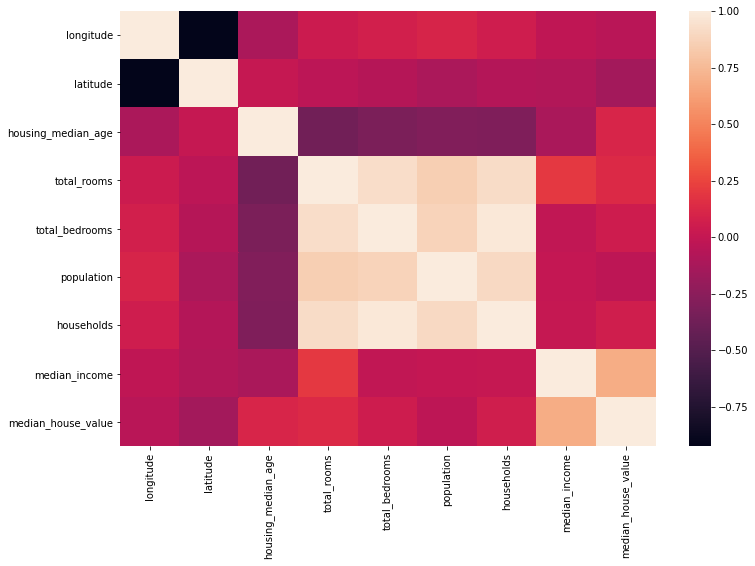

In [51]:
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(housing_corr)
plt.show()

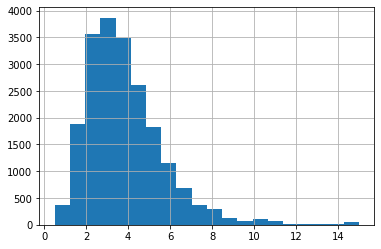

In [55]:
df['median_income'].hist(bins = 20)
plt.show()

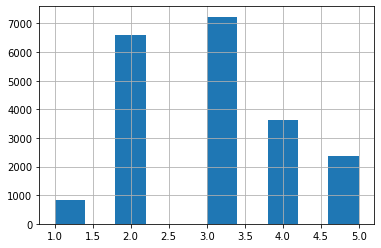

In [58]:
# if we break our income into 5 categories

df['income_cat'] = pd.cut(df['median_income'], bins = [0,1.5,3.0,4.5,6,np.inf],
                          labels = [1,2,3,4,5])
df['income_cat'].hist()
plt.show()

# we can see most the is in the 2-4 thousans range. We are going to make to do a stratifiedshufflesplit to make sure
# this abdundance of income in this range is well represented in the train and test set. 

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index, in split.split(df, df['income_cat']):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]


In [61]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [62]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [63]:
# we can see that the income categories are now well represented in both our dataset.

In [65]:
# for comparison we can compare this to the distrubiton that we would get from using train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [67]:
train['income_cat'].value_counts() / len(train)

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

In [68]:
test['income_cat'].value_counts() / len(test)

# in this case we actually get very similiar results so using either or, it doesnt really matter

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

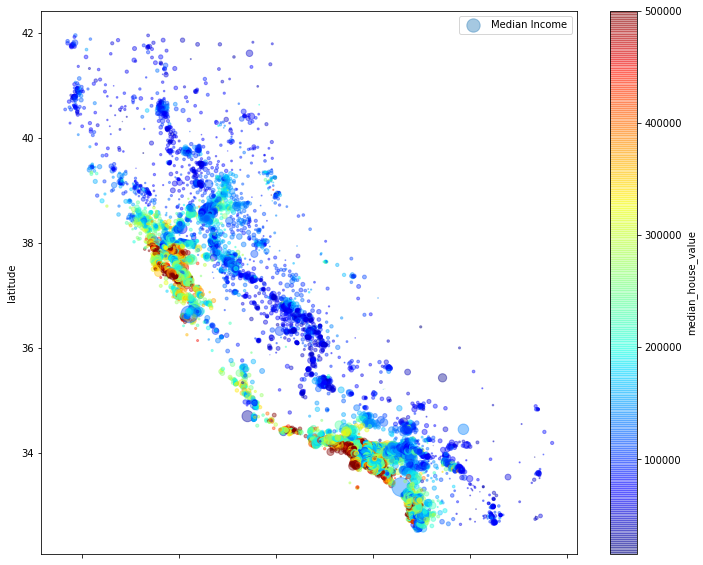

In [86]:
df.plot(x='longitude', y='latitude', kind = 'scatter', alpha = 0.4, figsize = (12,10),
             cmap = plt.get_cmap('jet'), s=df['population']/100, label = 'Median Income' ,c='median_house_value')
plt.show()

In [89]:
# Sometimes it can be beneifical to add additonal columns to your dataset which have the potential to have a greater impact of the labels

In [90]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_rooms'] =  df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [95]:
housing_corr = df.corr()
housing_corr.sort_values('median_house_value', ascending=False)['median_house_value']

# we can see that rooms_per_household is actually the second most postively correlated feature in the dataset
# and bedrooms_per_room is the most negatively correlated feature

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

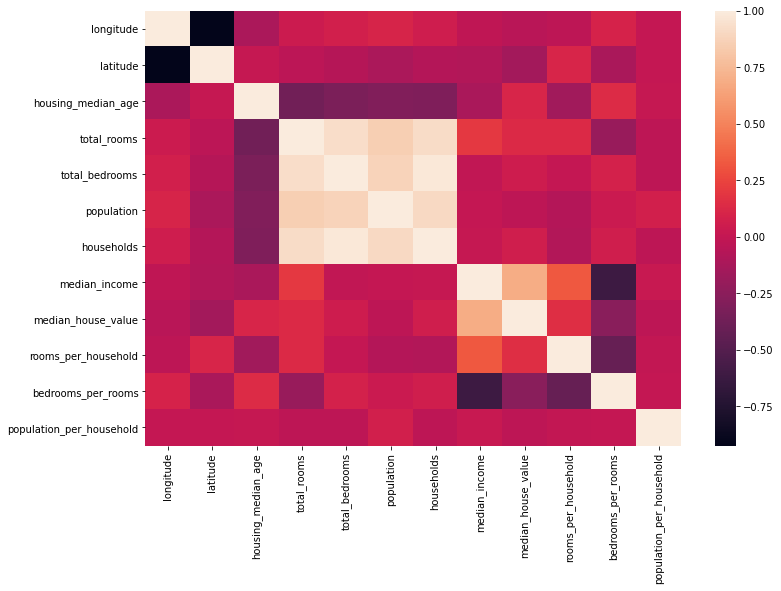

In [92]:
f, ax = plt.subplots(figsize = (12,8))

sns.heatmap(housing_corr)
plt.show()

### Pipeline

In [87]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [98]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CustomAttrAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self, X, y = None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
      
    else:
      return np.c_[X, rooms_per_household, population_per_household]

In [99]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy = 'median')),
                         ('attrs_adder', CustomAttrAdder()),
                         ('std_scaler', StandardScaler() )
])

In [101]:
housing_num = housing.drop(columns = 'ocean_proximity', axis = 1)

num_attrs = list(housing_num)
cat_attrs = ['ocean_proximity']


full_pipeline = ColumnTransformer([
                          ('num', num_pipeline, num_attrs),
                          ('cat', OneHotEncoder(), cat_attrs)
])

In [102]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

#### Selecting and training Model

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# looking at a couple predictions

some_data = housing.iloc[:5]
some_data_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions ', lin_reg.predict(some_data_prepared))
print('Labels ', list(some_data_labels))

Predictions  [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]
Labels  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [106]:
# lets evaluate the model using mean_squared_error and cross val score

from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(housing_prepared)

mse = mean_squared_error(housing_labels, y_pred)
rmse = np.sqrt(mse)
rmse

68376.64295459937

In [139]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, y=housing_labels, cv =5,
                         scoring = 'neg_mean_squared_error')
lin_scores = np.sqrt(-scores)

display_scores('linear_reg', lin_scores)

Regressor:  linear_reg
scores:  [66769.33471265 72424.97134486 69423.20544297 66255.47085714
 69500.40558681]
mean:  68874.67758888852
standard dev:  2217.6436421539497


In [131]:
mean_score = {}

def display_scores(regressor, scores):
  print('Regressor: ', regressor)
  print('scores: ', scores)
  print('mean: ', scores.mean())
  print('standard dev: ', scores.std())

  mean_score[regressor] = scores.mean()

In [132]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [133]:
tree_pred = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [134]:
scores = cross_val_score(tree_reg, X=housing_prepared, y=housing_labels,
                              cv=5, scoring = 'neg_mean_squared_error')
tree_scores = np.sqrt(-scores)
display_scores('Decision Tree', tree_scores)

# looks like we get a higher mean but a lower standard deviaton compared to linear regression

Regressor:  Decision Tree
scores:  [68823.61846617 70448.95769281 73359.28937043 70476.57915442
 72856.10444097]
mean:  71192.90982495775
standard dev:  1681.639236762933


In [135]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)

forest_pred = forest_reg.predict(housing_prepared)

In [136]:
forest_mse = mean_squared_error(housing_labels, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18795.976535940714

In [137]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=5,
                         scoring = 'neg_mean_squared_error')
forest_scores = np.sqrt(-scores)
display_scores('Random Forest', forest_scores)

# random forest has the lowest mean between cross validation scores

Regressor:  Random Forest
scores:  [49181.98877216 50865.89602298 51900.96420632 48538.3147213
 51715.56711132]
mean:  50440.54616681706
standard dev:  1352.1740233532046


In [144]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(housing_prepared, housing_labels)

svr_pred = svr.predict(housing_prepared)

In [145]:
svr_mse = mean_squared_error(housing_labels, svr_pred)

svr_rmse = np.sqrt(svr_mse)

svr_rmse

118455.13476469375

In [148]:
scores = cross_val_score(svr, housing_prepared, housing_labels, cv=5, scoring = 'neg_mean_squared_error')

svr_scores = np.sqrt(-scores)

display_scores('SVR', svr_scores)

Regressor:  SVR
scores:  [115388.5544457  118553.15722732 119941.32662915 119538.16880091
 119183.64554161]
mean:  118520.97052893802
standard dev:  1631.2147896839492


In [149]:
mean_score
# it  looks like Random Forest is by far the best 

{'Decision Tree': 71192.90982495775,
 'Random Forest': 50440.54616681706,
 'SVR': 118520.97052893802,
 'linear_reg': 68874.67758888852}

In [151]:
# now we can use grid search cv to fine tune the random forest model and see what if we can get even better predictions

from sklearn.model_selection import GridSearchCV

params_grid = [
        {'n_estimators': [3,10,30], 'max_features': [4,6,8]},
        {'bootstrap':[False], 'n_estimators': [10,30], 'max_features':[6,8,10]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, params_grid, cv=3,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [152]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 30}

In [153]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [154]:
cv_scores = grid_search.cv_results_

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
  print(np.sqrt(-mean_score), params)

62424.05151126592 {'max_features': 4, 'n_estimators': 3}
54031.77930710201 {'max_features': 4, 'n_estimators': 10}
52333.99325851348 {'max_features': 4, 'n_estimators': 30}
61009.9773548785 {'max_features': 6, 'n_estimators': 3}
53822.390341218925 {'max_features': 6, 'n_estimators': 10}
51389.39192661784 {'max_features': 6, 'n_estimators': 30}
60758.55931136839 {'max_features': 8, 'n_estimators': 3}
53423.685144736635 {'max_features': 8, 'n_estimators': 10}
51199.2165460005 {'max_features': 8, 'n_estimators': 30}
53143.10277177212 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
50556.55221581722 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
52834.93029673164 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
50540.06026355808 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}
52823.57303553797 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
51277.58745115007 {'bootstrap': False, 'max_features': 10, 'n_estimators': 30}


In [156]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [157]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print('RMSE: ', final_rmse)

RMSE:  48269.0548547721
